In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

EPSILON = 1e-20

### Problem 1

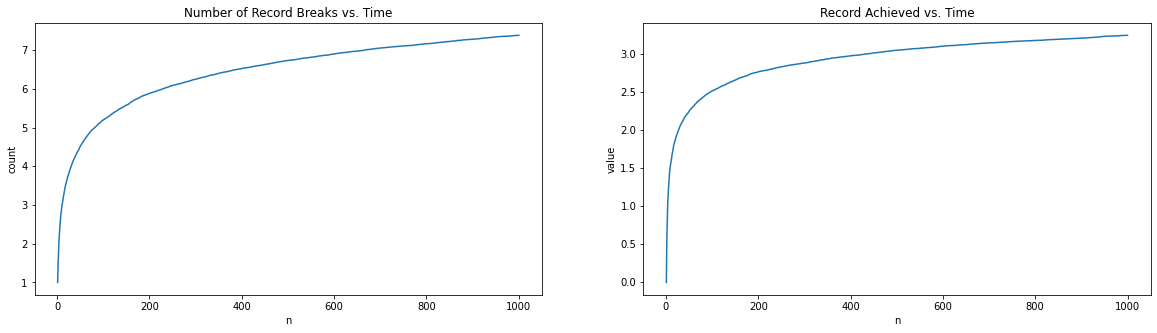

In [9]:
T = 1000
n = 1000

N_sum, R_sum = np.zeros(n+1), np.zeros(n+1)

for t in range(T):
    X = np.random.randn(n+1)
    N, R = np.zeros(n+1), np.zeros(n+1)
    N[0], R[0] = 0, -np.inf
    for i in range(1, n+1):
        R[i] = max(R[i-1], X[i])
        N[i] = N[i-1] + (1 if R[i-1] < X[i] else 0)
    N_sum += N
    R_sum += R

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
I = range(1, n+1)
axs[0].plot(I, N_sum[I] / T)
axs[0].set_title('Number of Record Breaks vs. Time')
axs[0].set_xlabel('n')
axs[0].set_ylabel('count')

axs[1].plot(I, R_sum[I] / T)
axs[1].set_title('Record Achieved vs. Time')
axs[1].set_xlabel('n')
axs[1].set_ylabel('value')
plt.show()

### Problem 2

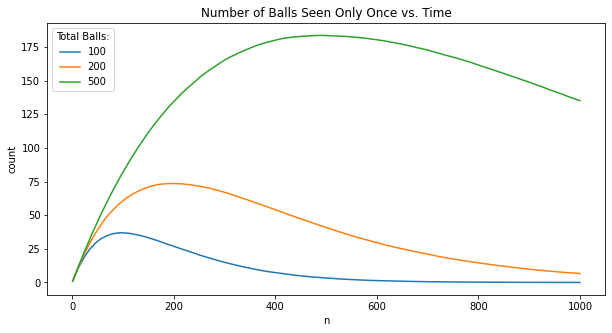

In [3]:
T = 1000
n = 1000

plt.figure(figsize=(10, 5))

for m in [100, 200, 500]:
    N_sum = np.zeros(n)
    for t in range(T):
        samples = np.random.choice(range(m), n, replace=True)
        counts = np.zeros(m)
        N = np.zeros(n)
        for i in range(n):
            counts[samples[i]] += 1
            N[i] = np.count_nonzero(counts == 1)
        N_sum += N

    plt.plot(range(1, n+1), N_sum / T, label=str(m))

plt.legend(title='Total Balls:')
plt.title('Number of Balls Seen Only Once vs. Time')
plt.xlabel('n')
plt.ylabel('count')
plt.show()

### Problem 3

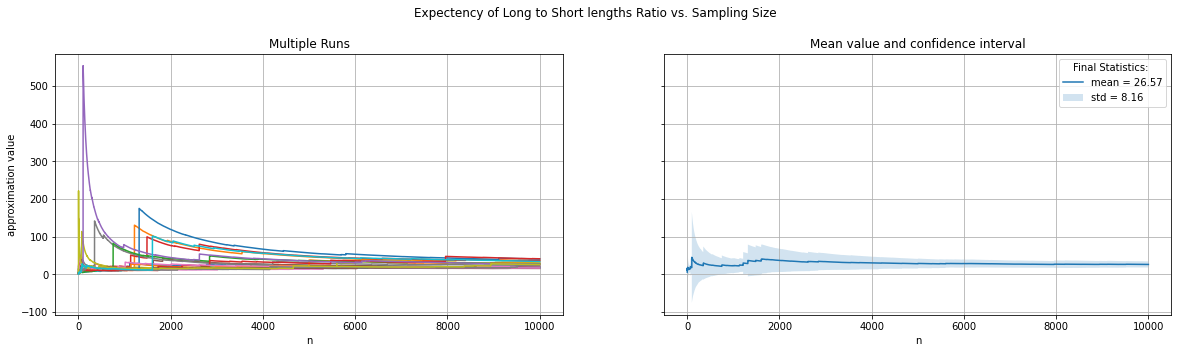

In [4]:
n = 10000
T = 20

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharey='all')
results = pd.DataFrame()

for t in range(T):
    R = np.zeros(n)
    X = np.random.rand(n).reshape(-1, 1)
    Y = np.concatenate([X, 1-X], axis=1)
    R = Y.max(axis=1) / Y.min(axis=1)
    Exp_R = np.cumsum(R) / np.arange(1, n+1)
    axs[0].plot(range(1, n+1), Exp_R, label=str(t+1))
    results[t] = Exp_R

fig.subplots_adjust(top=0.85)
fig.suptitle('Expectency of Long to Short lengths Ratio vs. Sampling Size')

axs[0].set_title("Multiple Runs")
axs[0].set_xlabel("n")
axs[0].set_ylabel("approximation value")
axs[0].grid()

results_mean, results_std = results.mean(axis=1), results.std(axis=1)
axs[1].set_title("Mean value and confidence interval")
axs[1].set_xlabel("n")
axs[1].plot(range(1, n+1), results_mean, label=f"mean = {results_mean.values[-1]:.2f}")
axs[1].fill_between(
    range(1, n+1),
    results_mean - results_std,
    results_mean + results_std,
    alpha=0.2,
    label=f"std = {results_std.values[-1]:.2f}"
)
axs[1].grid()
axs[1].legend(title='Final Statistics: ')

plt.show()

### Problem 4

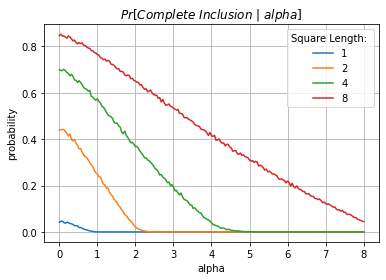

In [5]:
T = 10000

for l in 2 ** np.arange(4):
    results = []
    for alpha in np.linspace(EPSILON, 8, 201):
        x_center = np.random.rand(T) * l
        y_center = np.random.rand(T) * l
        theta = np.random.rand(T) * np.pi
        cos_theta_square = np.cos(theta) ** 2
        sin_theta_square = np.sin(theta) ** 2
        y_max_length = np.sqrt(cos_theta_square + (alpha ** 2) * sin_theta_square) / 2
        x_max_length = np.sqrt(sin_theta_square + (alpha ** 2) * cos_theta_square) / 2
        results.append(np.count_nonzero(
            (x_center - x_max_length > 0) &
            (x_center + x_max_length < l) &
            (y_center - y_max_length > 0) &
            (y_center + y_max_length < l)
        ) / T)

    plt.plot(np.linspace(EPSILON, 8, 201), results, label=str(l))

plt.legend(title='Square Length: ')
plt.grid()
plt.title(r"$Pr[Complete\ Inclusion\ |\ alpha]$")
plt.xlabel('alpha')
plt.ylabel('probability')
plt.show()

### Problem 5

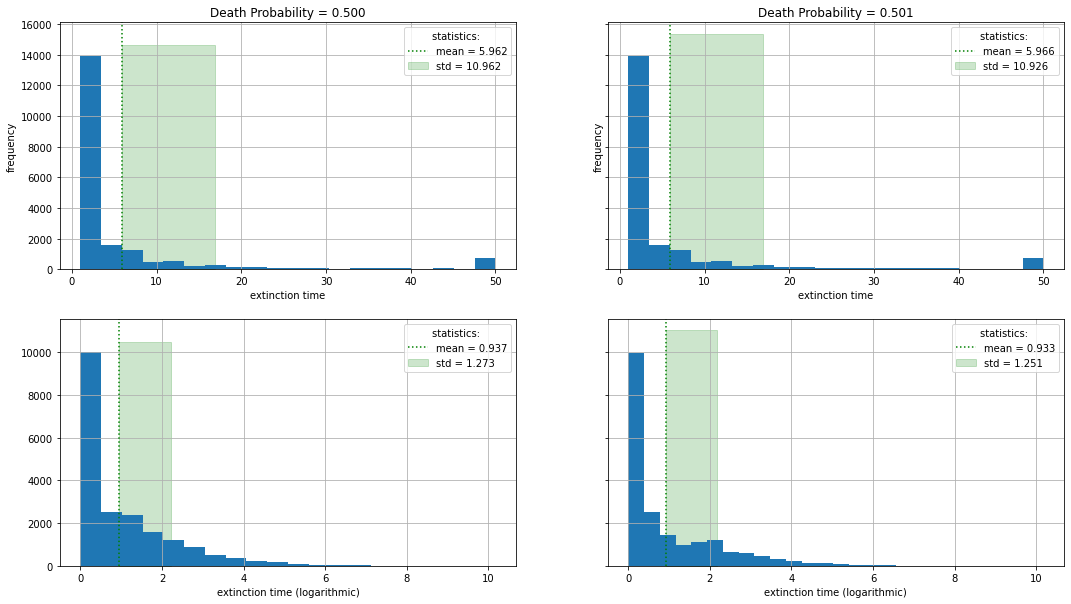

In [6]:
n = 20000
N = np.zeros(n)

_, axs = plt.subplots(nrows=2, ncols=2, sharex='row', sharey='row', figsize=(18, 10))
plt_x_limit = 50
max_limit = 200000

for ind, p_death in enumerate([0.5, 0.501]):
    overload_flag = False
    axs[0, ind].set_ylabel('frequency')
    for i in range(n):
        X = 1
        life_time = 0
        while X > 0 and life_time < max_limit:
            X = np.count_nonzero(np.random.rand(X) >= p_death) * 2
            life_time += 1
        if life_time == max_limit:
            if overload_flag:
                print('+', end='')
            else:
                overload_flag = True
                print(f"Life time Overload for Pr[death] = {p_death}:\n  ", end='')
                print('+', end='')
        N[i] = life_time

    N_copy = N.copy()
    for j in range(2):
        N = N_copy.copy()
        if j == 0:
            N[N > plt_x_limit] = plt_x_limit
            axs[j, ind].set_xlabel('extinction time')
        else:
            N = np.log(N)
            axs[j, ind].set_xlabel('extinction time (logarithmic)')
        mean, std = N.mean(), N.std()
        axs[j, ind].hist(N, bins=20)
        axs[j, ind].fill_betweenx(
            y=axs[j, ind].get_ylim(),
            x1=[mean, mean],
            x2=[mean+std, mean+std],
            alpha=0.2,
            color='green',
            label=f'std = {std:.3f}'
        )
        axs[j, ind].axvline(
            mean,
            color='green',
            label=f'mean = {mean:.3f}',
            linestyle=':'
        )
        axs[j, ind].grid()
        if j == 0:
            axs[j, ind].set_title(f"Death Probability = {p_death:.03f}")
        axs[j, ind].legend(title='statistics: ')

plt.show()

### Problem 6

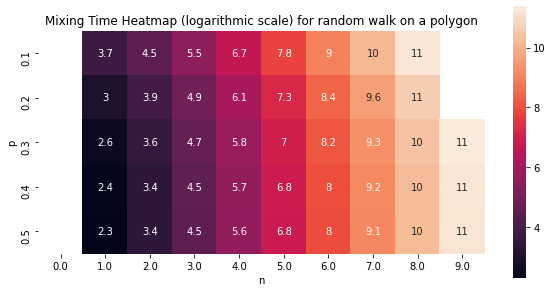

In [7]:
max_T = 100000
m_n, m_p = 10, 5

xticks = 2 ** np.arange(m_n) + 1
yticks = np.linspace(0, 0.5, m_p+1)[1:]
mixing_time = np.zeros([len(xticks), len(yticks)])

for i_n, n in enumerate(xticks):
    for i_p, p in enumerate(yticks):
        P = np.zeros([n, n])
        P[0, n-1], P[n-1, 0] = p, 1-p
        P[0:n-1, 1:n] += np.diag(np.ones(n-1) * (1-p))
        P[1:n, 0:n-1] += np.diag(np.ones(n-1) * p)
        pi = sp.linalg.null_space(np.eye(n)-P.T)
        pi = pi / np.sum(pi)
        sigma = np.zeros(n)
        sigma[0] = 1
        T = 0
        residual = 1
        while residual > 0.001:
            sigma = np.dot(sigma, P)
            residual = np.linalg.norm(sigma - pi.T, 1)
            T += 1
            if T > max_T:
                break
        mixing_time[i_n, i_p] = np.log(T)

mixing_time[mixing_time > np.log(max_T)] = np.nan
plt.figure(figsize=(m_n, m_p))
sns.heatmap(mixing_time.T, annot=True, square=True)
plt.xticks(plt.xticks()[0], np.log2(xticks - 1))
plt.yticks(plt.yticks()[0], np.round(yticks, 2))
plt.title("Mixing Time Heatmap (logarithmic scale) for random walk on a polygon")
plt.xlabel("n")
plt.ylabel("p")
plt.show()

Testing for relation with p

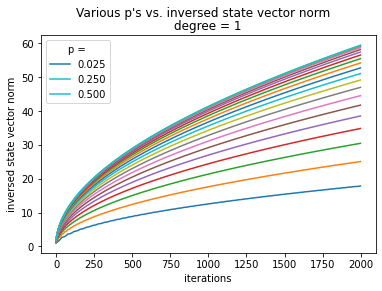

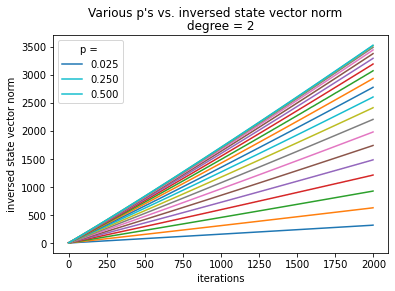

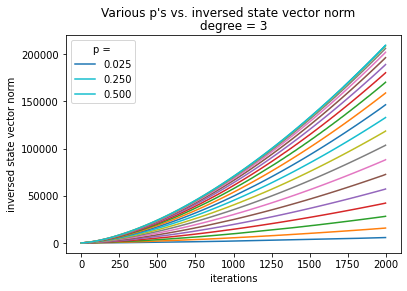

In [2]:
n = 1001
max_T = 2000

for degree in range(1, 4):

    for i, p in enumerate(np.linspace(0, 0.5, 21)[1:]):
        errors = []
        sigma = np.zeros(n)
        sigma[0] = 1
        t = 1
        while t < max_T:
            sigma = np.roll(sigma, 1) * (1-p) + np.roll(sigma, -1) * p
            errors.append(np.linalg.norm(sigma, np.inf))
            t += 1
        if i in [0, 9, 19]:
            plt.plot(1/np.array(errors)**degree, label=f'{p:.3f}')
        else:
            plt.plot(1/np.array(errors)**degree)

    plt.legend(title='p = ')
    plt.suptitle("Various p's vs. inversed state vector norm")
    plt.title(f'degree = {degree}')
    plt.xlabel('iterations')
    plt.ylabel('inversed state vector norm')
    plt.show()

Testing for relation with n

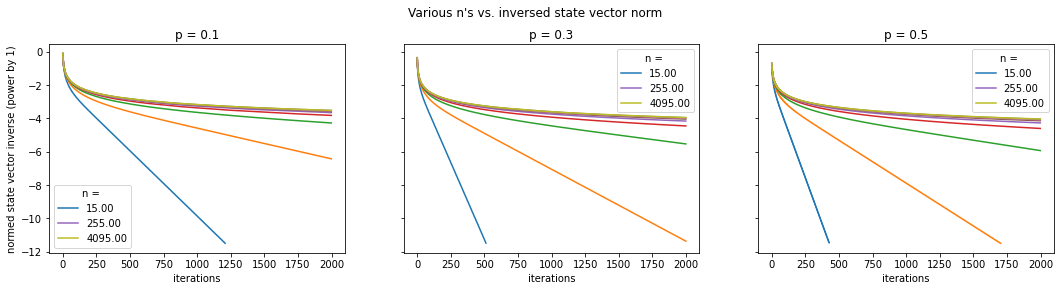

In [26]:
max_T = 2000

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), sharex='all', sharey='row')

for i_degree, degree in enumerate([1]):
    
    axs[0].set_ylabel(f'normed state vector inverse (power by {degree})')
    
    for i_p, p in enumerate([0.1, 0.3, 0.5]):
        for i, n in enumerate(2**np.arange(4, 13) - 1):
            errors = []
            sigma = np.zeros(n)
            sigma[0] = 1
            t = 1
            while t < max_T:
                sigma = np.roll(sigma, 1) * (1-p) + np.roll(sigma, -1) * p
                errors.append(np.linalg.norm(sigma, np.inf) - 1/n)
                t += 1
            
            errors = np.array(errors)
            errors[errors < 1e-5] = np.nan
            if i % 4 == 0:
                axs[i_p].plot(np.log(np.array(errors)) ** degree, label=f'{n:.2f}')
            else:
                axs[i_p].plot(np.log(np.array(errors)) ** degree)

        axs[i_p].legend(title='n = ')
        if i_degree == 0:
            axs[i_p].set_title(f'p = {p}')
            axs[i_p].set_xlabel('iterations')


fig.subplots_adjust(top=0.85)
fig.suptitle("Various n's vs. inversed state vector norm")
plt.show()

Finding the relation with n

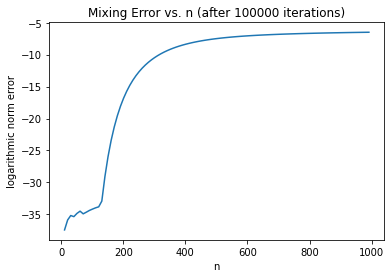

In [16]:
max_T = 100000

p = 0.5
errors = []
for n in (10*np.arange(1, 100) + 1):
    sigma = np.zeros(n)
    sigma[0] = 1
    t = 1
    for t in range(max_T):
        sigma = np.roll(sigma, 1) * (1-p) + np.roll(sigma, -1) * p
    errors.append((n, np.log(np.linalg.norm(sigma, np.inf) - 1/n)))
errors = np.array(errors)

plt.plot(errors[:, 0], errors[:, 1])
plt.title(f'Mixing Error vs. n (after {max_T} iterations)')
plt.xlabel('n')
plt.ylabel('logarithmic norm error')
plt.show()

Finding the relation with p

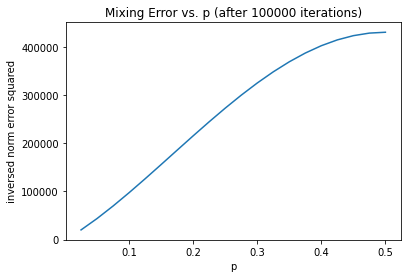

In [18]:
max_T = 100000

n = 1001
errors = []
for p in np.linspace(0, 0.5, 21)[1:]:
    sigma = np.zeros(n)
    sigma[0] = 1
    t = 1
    for t in range(max_T):
        sigma = np.roll(sigma, 1) * (1-p) + np.roll(sigma, -1) * p
    errors.append((p, 1/(np.linalg.norm(sigma, np.inf) - 1/n) ** 2))
errors = np.array(errors)

plt.plot(errors[:, 0], errors[:, 1])
plt.title(f'Mixing Error vs. p (after {max_T} iterations)')
plt.xlabel('p')
plt.ylabel('inversed norm error squared')
plt.show()

### Problems 7 & 8

No handles with labels found to put in legend.


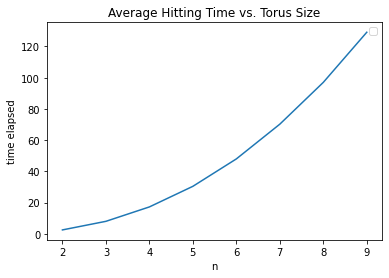

In [50]:
T = 10000
N = 10

hitting_time = np.zeros(N)
covering_time = np.zeros(N)
for n in range(2, N):
    hitting_times_matrix = np.zeros([n, n])
    for t in range(T):
        seen = np.zeros([n, n], dtype=bool)
        theta = np.zeros([n, n])
        current_position = np.zeros(2, dtype=int)
        seen[0, 0] = True
        time_elapsed = 0
        while ~seen.all():
            time_elapsed += 1
            component = int(np.random.rand() > 0.5)
            direction = int(np.sign(np.random.rand() - 0.5))
            direction = (-1 if direction == 0 else direction)
            current_position += np.array([component, 1-component]) * direction
            current_position[current_position < 0] += n
            current_position[current_position >= n] -= n
            a, b = current_position[0], current_position[1]
            if not seen[a, b]:
                theta[a, b] = time_elapsed
            seen[a, b] = True
        
        hitting_times_matrix += theta
        hitting_time[n] += theta.mean()
        covering_time[n] += time_elapsed

plt.plot(range(2, N), hitting_time[2:N] / T)
plt.title("Average Hitting Time vs. Torus Size")
plt.xlabel('n')
plt.ylabel('time elapsed')
plt.legend()
plt.show()

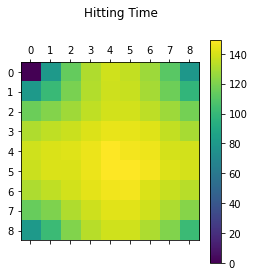

In [51]:
plt.matshow(hitting_times_matrix / T)
plt.colorbar()
plt.suptitle("Hitting Time")
plt.title('')
plt.show()

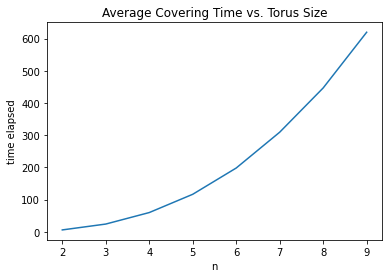

In [52]:
plt.plot(range(2, N), covering_time[2:N] / T)
plt.title("Average Covering Time vs. Torus Size")
plt.xlabel('n')
plt.ylabel('time elapsed')
plt.show()

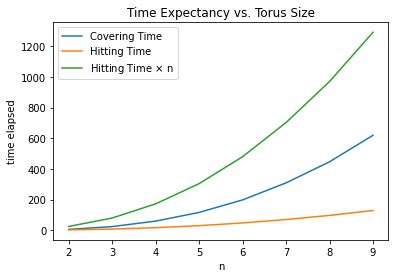

In [62]:
plt.plot(range(2, N), covering_time[2:N] / T, label='Covering Time')
plt.plot(range(2, N), hitting_time[2:N] / T, label='Hitting Time')
plt.plot(range(2, N), hitting_time[2:N] / T * N, label=r'Hitting Time $\times$ n')
plt.title("Time Expectancy vs. Torus Size")
plt.xlabel('n')
plt.ylabel('time elapsed')
plt.legend()
plt.show()

### Problem 9

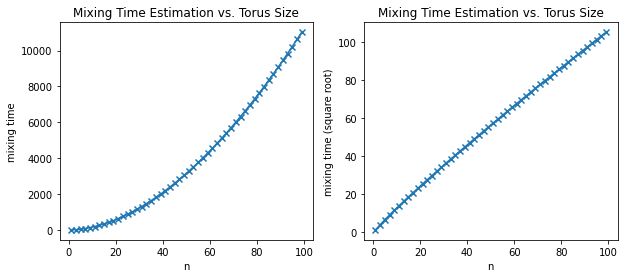

In [65]:
max_T = 1000000
N = 50

results = []
for n in 2 * np.arange(N) + 1:
    M = np.zeros([n, n])
    M[0, 0] = 1
    t, error = 0, 1
    while error > 0.0001 and t < max_T:
        M = (np.roll(M, 1, axis=0) + np.roll(M, -1, axis=0) +
             np.roll(M, 1, axis=1) + np.roll(M, -1, axis=1)) / 4
        error = np.linalg.norm(M - np.ones([n, n])/(n ** 2), 1)
        t += 1
    results.append(t)

results = np.array(results)

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex='all')

axs[0].scatter(2 * np.arange(N) + 1, results, marker='x')
axs[0].plot(2 * np.arange(N) + 1, results)
axs[0].set_title('Mixing Time Estimation vs. Torus Size')
axs[0].set_xlabel('n')
axs[0].set_ylabel('mixing time')

axs[1].scatter(2 * np.arange(N) + 1, np.sqrt(results), marker='x')
axs[1].plot(2 * np.arange(N) + 1, np.sqrt(results))
axs[1].set_title('Mixing Time Estimation vs. Torus Size')
axs[1].set_xlabel('n')
axs[1].set_ylabel('mixing time (square root)')

plt.show()

### Problem 10

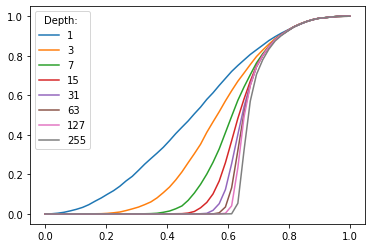

In [14]:
n = 128
N = 2*n + 1
n_p = 100
T = 5000

still_alive = np.zeros([n_p, int(np.log2(n)) + 1])

for t in range(T):
    P = np.random.rand(N, N)
    P[0, 0] = 1
    for i in 2 * np.arange(1, n+1):
        P[i, 0] = min(P[i-1, 0], P[i-2, 0])
    for j in 2 * np.arange(1, n+1):
        P[0, j] = min(P[0, j-1], P[0, j-2])
        
    for i in 2 * np.arange(1, n+1):
        for j in 2 * np.arange(1, n+1):
            P[i, j] = max(min(P[i-1, j], P[i-2, j]), min(P[i, j-1], P[i, j-2]))
            
    results = np.zeros(n+1)
    results[0] = 1
    for i in 2 * np.arange(1, n+1):
        for j in 2 * np.arange(1, n+1):
            results[(i+j) // 4] = max(results[(i+j) // 4], P[i, j])

    for ind, p in enumerate(np.linspace(0, 1, n_p)):
        for i in range(1, int(np.log2(n)) + 1):
            still_alive[ind, i] += (results[2**i-1] > 1-p)
            
for i in range(1, int(np.log2(n)) + 1):
    plt.plot(np.linspace(0, 1, n_p), still_alive[:, i] / T, label=f'{int(2**i-1)}')
plt.legend(title='Depth: ')
plt.title('Survival Probability Change in Different Depths')
plt.xlabel('p')
plt.ylabel('survival probability')
plt.show()